<h1> Notebook 1 - Regresión Lineal</h1>

<p> En este notebook, vamos a implementar un método utilizando el algoritmo de <b>regresión lineal</b> en Python. El objetivo es poder describir este algoritmo y poder re-utilizarlo para resolver problemas de clasificación simple.</p> 

<h2> 1. Definición </h2>
<p> El algoritmo de <b>regresión lineal</b> es un algortimo de aprendizaje supervisado, de tipo <b>regresión</b>. Los algoritmos de regresión permiten de predecir <b> variables <u>continuas</u></b> a partir de una variable (este caso, hablamos de regresión lineal simple) o varias variables (regresión lineal múltiple).</p>

<p>Por ejemplo, predecir el precio de una casa según la superficie de la casa, su ubicación y/o el tipo de material utilizado, es típicamente un problema de regresión.</p>
    
<p> En otros terminos, la <b>regresión lineal</b> consiste en encontrar una recta, un plano o un hiperplano que aproxima la distribución de un conjunto de puntos. Detallamos esta idea a continuación con ejemplos e implementación en Python. </p>

<h2> 2. Implementación de una Regresión Lineal simple </h2>

<p>Consideremos el <b>problema siguiente</b>:</p>
<p>Usted es el jefe de una empresa de <i>FoodTrucks</i> y busca una nueva ciudad dónde implementar un nuevo punto de venta. Su empresa ya tiene camiones en distintas ciudades y tiene a su disposición los datos indicandos el beneficio realizado en cada ciudad. Usted desea utilizar estos datos para estimar qué beneficio van a realizar según la ciudad escogida.</p>

<p> Este problema es de tipo <b>supervisado</b> porque conocemos cuál es el tipo de variable que queremos predecir:</p>
 - Y: la variable que queremos predecir (<i>volumen de negocio</i>),<br>
 - X: la variable explicativa (<i>tamaño de la ciudad</i>)

In [ ]:
#Nuestros datos son al formato CSV y tienen 2 columnas: la populación de la ciudad (por 10000 personas) 
#y el beneficio realizado por la empresa en este ciudad
import pandas as pd
df = pd.read_csv("nb1-dataset1.csv")
df

In [2]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = df.iloc[0:len(df),0]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
Y = df.iloc[0:len(df),1] 

In [3]:
#Visualización de los datos
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

Para aprender un modelo predictivo basado en una regresión lineal, vamos a utilizar la librería Python ScyPy (una librería python open-source para las matemáticas: <a href="https://www.scipy.org/">SciPy</a>).

In [4]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

<b>Preguntas</b>: 
- ¿Qué hizó la función 'linregress'? <br>
Calcula una regresión lineal de mínimos cuadrados para dos conjuntos de mediciones, en este caso X e Y. Calcula entre otros datos, los coeficientes necesarios para formar la función de predicción.
- ¿A qué corresponden las variables 'slope' e 'intercept'? <br>
slope: Pendiente de la línea de regresión.
intercept: Intersección de la línea de regresión.
- ¿A qué corresponden las otras variables?
r_value: Coeficiente de correlación.
p_value: Valor p de dos lados para una prueba de hipótesis cuya hipótesis nula es que la pendiente es cero, usando la prueba de Wald con la distribución t de la estadística de prueba.
std_err: Error estándar del gradiente estimado.

In [5]:
#Definemos una función que predice 'y' (variable de output), a partir de 'x' (variable de input)  
def predict(x):
   return slope * x + intercept

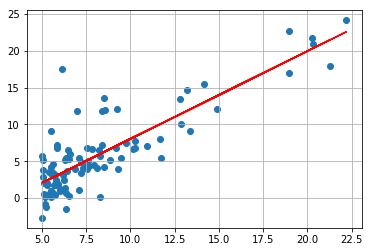

In [6]:
#Visualizemos el modelo aprendido por el algoritmo de Regresión Lineal
fitLine = predict(X)
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.show()

<p>Según este modelo, ¿cuál sería el beneficio esperado si la ciudad en la cual pensamos instalar un <a>FoodTruck</a> tiene 127.000 habitantes?</p> (pueden utilizar la función "predict()" que definimos anteriormente).

In [8]:
print(predict(12.7))

11.255746402895989


<b>Preguntas</b>:
    - ¿Cómo saber qué tan correcto es nuestro modelo?
    A través de la variable std_err.
    - ¿Qué deberiamos hacer para medir la calidad predictiva de nuestro modelo?
    Probarlo y compararlo con un dataset de prueba.

<h2> 3. Regresión lineal múltiple </h2>

En general, no es siempre posible predecir una variable a partir de una sola variable explicativa. A menudo, se necesita varias variables. En este caso, hablamos de <i>Multivariate Regresion</i>.

<b>Problema</b>:
<p>Supongamos que usted quiere vender su casa y buscar cuál podría ser un buen precio para venderla. Tienen a su disposición un dataset que indica el precio de venta de varias casas de su región y de 2 otras variables:</p>
- la superficie de la casa, <br>
- el número de habitaciones.

In [9]:
import pandas as pd
df2 = pd.read_csv("nb1-dataset2.csv")
print(df2.head())

   Superficie  Numero_habitaciones  Precio
0        2104                    3  399900
1        1600                    3  329900
2        2400                    3  369000
3        1416                    2  232000
4        3000                    4  539900


Luego, tenemos que diferenciar las variables predictivas X (Superficie, Numero de habitaciones) y la variable objetivo Y (Precio).

In [10]:
# Variable objetivo
Y = df2["Precio"]
# Variables predictivas (o explicativas)
X = df2[['Superficie','Numero_habitaciones']]

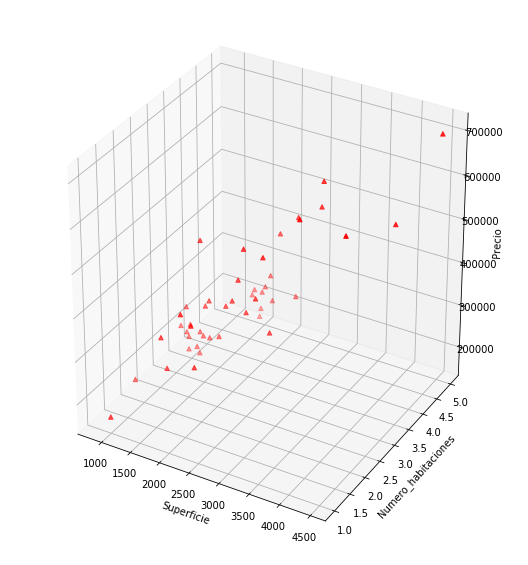

In [11]:
#Visualizemos los datos en un espacio en 3 dimensiones
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df2["Superficie"], df2["Numero_habitaciones"], df2["Precio"], c='r', marker='^')
 
ax.set_xlabel('Superficie')
ax.set_ylabel('Numero_habitaciones')
ax.set_zlabel('Precio')
 
plt.show()

Para poder utilizar el algoritmo Multivariate Regresion, es necesario realizar una etapa de normalización de las variables, para darles un valor entre -1 y 1. La librería Python Scikit-learn permite realizar este proceso.

In [12]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['Superficie', 'Numero_habitaciones']].as_matrix())

/Users/intiromero/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Entre los algoritmos de Regresión Múltiples, existe el método <i>Ordinary Least Squares</i> (OLS). OLS es un método de optimización que busca minimizar la suma de las diferencias observadas entre las predicciones del modelo y los datos de entrenamiento. Con el paquete 'statsmodels', se puede entrenar un modelo OLS y obtener un resumen del modelo:

In [13]:
import statsmodels.api as sm

est = sm.OLS(Y, X).fit()
print(est.summary())

/Users/intiromero/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     631.4
Date:                Fri, 31 Aug 2018   Prob (F-statistic):           1.19e-33
Time:                        12:07:22   Log-Likelihood:                -589.11
No. Observations:                  47   AIC:                             1182.
Df Residuals:                      45   BIC:                             1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Superficie            140.8611    

La variable 'coef' nos indica cuál es el factor de ponderación de cada variable predictiva. Podemos entonces construir nuestra funcion de predicción:

In [14]:
def predict_price_of_house(Superficie, Numero_habitaciones):
    return 140.8611 * Superficie + 1.698e+04 * Numero_habitaciones

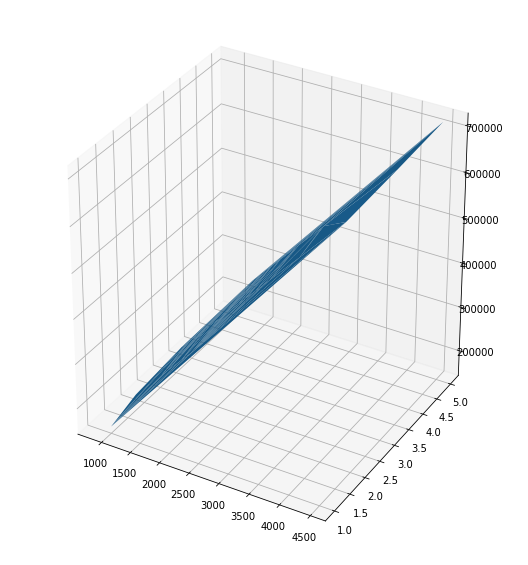

In [15]:
#Visualización del modelo obtenido

import matplotlib.pyplot as plt

def predict_all(lst_sizes, lst_nb_rooms):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_rooms[n]))
    return predicted_prices

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
 
ax.plot_trisurf(df2["Superficie"], df2["Numero_habitaciones"], predict_all(df2["Superficie"], df2["Numero_habitaciones"]))
                   
plt.show()


In [16]:
print(predict_price_of_house(4500,5))

718774.95


<b>Preguntas:</b>
- ¿Cuál es el principal limite de los modelos predictivos lineales?
El primer límite es que supone que en la naturaleza las relaciones son de tipo lineal. 
- ¿Qué es la Regresión Polinomial? ¿La Regresión Lineal es una Regresión Polinomial?

<h2> 3. Trabajo práctico </h2>

<b>Problema</b>: 
    
<p>Tenemos a disposición un dataset con 1338 observaciones (filas) y 7 características (columnas): edad, genero, bmi (body mass index), número de niños, si es fumadora o no, su región y sus gastos en salud.</p>

<b>Pregunta</b>:
- Entrenar un modelo predictivo que estima los gastos de salud de un hombre de 55 años, sin niño, teniendo un bmi de 42.6, fumador.
- Desde un punto de vista del emprendimiento, ¿qué podría ser el valor añadido de este tipo de modelo predictivo? a quién podría servir?
- Desde un punto de vista científico y ético, ¿qué críticas podría emitir?



In [17]:
import pandas as pd
df3 = pd.read_csv("nb1-insurance2.csv",sep=';')
print(df3.head())

   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       0  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86


In [18]:
# Variable objetivo
Y = df3["expenses"]
# Variables predictivas (o explicativas)
X = df3[['age','sex','bmi','children','smoker']]

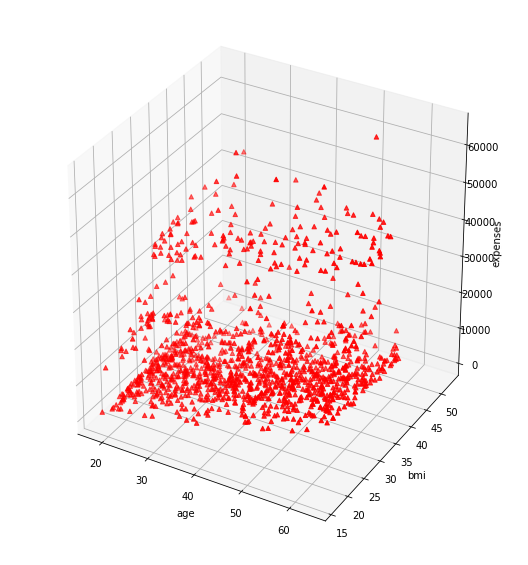

In [19]:
#Visualizemos los datos en un espacio en 3 dimensiones
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df3["age"], df3["bmi"], df3["expenses"], c='r', marker='^')
 
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('expenses')
 
plt.show()

In [20]:
#sex: 0 female - 1 male
#smoker: 0 no - 1 yes
#region: 0 southwest - 1 northwest - 2 southeast - 3 northeast
#SE NORMALIZAN LOS DATOS
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['age','sex','bmi','children','smoker']].as_matrix())

In [21]:
#SE OBTIENEN LOS COEFICIENTES DEL MODELO
import statsmodels.api as sm

est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1826.
Date:                Fri, 31 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:08:02   Log-Likelihood:                -13627.
No. Observations:                1338   AIC:                         2.726e+04
Df Residuals:                    1333   BIC:                         2.729e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          198.3998     11.581     17.131      0.0

In [22]:
#SE CREA EL MODELO
def predict_price_of_house(age,sex,bmi,children,smoker):
    return 198.3998 * age + -707.6684 * sex + 37.5784 * bmi + 250.8414 * children + 2.339e+04 * smoker 

In [23]:
print(predict_price_of_house(4500,5))

TypeError: predict_price_of_house() missing 3 required positional arguments: 'bmi', 'children', and 'smoker'